In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Rajasthan1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,0
131396,2014,12,31,20,0,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,0
131397,2014,12,31,21,0,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,0
131398,2014,12,31,22,0,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,-11,11.136730,984.379272,19.563755,116.428208,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,-10,10.646979,985.168579,21.357848,103.583783,0,2000-01-01 06:00:00
7,2000,1,1,7,0,0,0,0,0,0,0,-9,11.265209,985.925598,22.168916,91.181648,0,2000-01-01 07:00:00
8,2000,1,1,8,0,78,306,135,74,354,139,-8,14.277325,986.486450,20.120814,79.450627,0,2000-01-01 08:00:00
9,2000,1,1,9,0,114,597,331,121,600,339,-6,17.677278,986.856323,18.365240,68.755938,0,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2014-12-27,392.9
2014-12-28,398.0
2014-12-29,394.4


In [8]:
X

,Date,GHI
0,2000-01-01 08:00:00,135
1,2000-01-01 09:00:00,331
2,2000-01-01 10:00:00,488
3,2000-01-01 11:00:00,608
4,2000-01-01 12:00:00,664
...,...,...
54745,2014-12-31 13:00:00,617
54746,2014-12-31 14:00:00,538
54747,2014-12-31 15:00:00,413
54748,2014-12-31 16:00:00,228


In [9]:
y[:4380]

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2011-12-27,407.9
2011-12-28,408.3
2011-12-29,406.8


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
type(y)

pandas.core.frame.DataFrame

In [12]:
X_T=[]
X=X.loc[:,'GHI']
X=X.values

for i in range(0,54750,10):
  X_add = X[i:i+10]
  #print(i,j)
  X_T.append(X_add)
  
X_T=np.asarray(X_T)
X_T.shape

(5475, 10)

In [13]:
X_T

array([[135, 331, 488, ..., 438, 243,  42],
       [124, 319, 495, ..., 439, 250,  44],
       [136, 338, 500, ..., 436, 254,  42],
       ...,
       [131, 323, 482, ..., 406, 211,  23],
       [129, 322, 481, ..., 419, 234,  25],
       [128, 321, 473, ..., 413, 228,  28]])

In [14]:
Y_T=y.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(5475,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
  
# fit model
model.fit(X_T[:4380], Y_T[:4380], epochs=2000, verbose=0)


In [16]:
# demonstrate prediction
yhat=[]


for i in range(4380,5475):
  x_input = X_T[i]
  x_input = x_input.reshape(1,10)
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[405.71344]]
[[405.41437]]
[[404.81573]]
[[395.61496]]
[[405.7142]]
[[418.4117]]
[[401.71512]]
[[418.61145]]
[[414.31207]]
[[418.91153]]
[[371.43515]]
[[425.21033]]
[[429.9092]]
[[423.31143]]
[[408.6158]]
[[427.71048]]
[[438.50778]]
[[439.2073]]
[[444.20724]]
[[445.90668]]
[[450.2067]]
[[358.6483]]
[[456.30487]]
[[304.62418]]
[[381.1175]]
[[463.00388]]
[[470.40295]]
[[471.4027]]
[[470.1022]]
[[478.2014]]
[[483.10104]]
[[473.10257]]
[[477.30133]]
[[394.70087]]
[[481.00354]]
[[476.0018]]
[[481.5012]]
[[482.70044]]
[[485.4004]]
[[493.59903]]
[[499.39767]]
[[457.70047]]
[[510.0956]]
[[515.7941]]
[[511.1959]]
[[519.19385]]
[[475.1945]]
[[508.59772]]
[[536.79095]]
[[541.2909]]
[[546.4899]]
[[547.68994]]
[[556.18805]]
[[556.0884]]
[[561.6871]]
[[566.1864]]
[[569.286]]
[[574.68475]]
[[577.48486]]
[[543.8905]]
[[551.2895]]
[[550.6903]]
[[553.9886]]
[[542.6909]]
[[550.49005]]
[[550.1899]]
[[555.889]]
[[568.8859]]
[[575.6858]]
[[584.18396]]
[[589.283]]
[[593.4827]]
[[596.38214]]
[[601.0817]]
[[6

[array([[405.71344]], dtype=float32),
 array([[405.41437]], dtype=float32),
 array([[404.81573]], dtype=float32),
 array([[395.61496]], dtype=float32),
 array([[405.7142]], dtype=float32),
 array([[418.4117]], dtype=float32),
 array([[401.71512]], dtype=float32),
 array([[418.61145]], dtype=float32),
 array([[414.31207]], dtype=float32),
 array([[418.91153]], dtype=float32),
 array([[371.43515]], dtype=float32),
 array([[425.21033]], dtype=float32),
 array([[429.9092]], dtype=float32),
 array([[423.31143]], dtype=float32),
 array([[408.6158]], dtype=float32),
 array([[427.71048]], dtype=float32),
 array([[438.50778]], dtype=float32),
 array([[439.2073]], dtype=float32),
 array([[444.20724]], dtype=float32),
 array([[445.90668]], dtype=float32),
 array([[450.2067]], dtype=float32),
 array([[358.6483]], dtype=float32),
 array([[456.30487]], dtype=float32),
 array([[304.62418]], dtype=float32),
 array([[381.1175]], dtype=float32),
 array([[463.00388]], dtype=float32),
 array([[470.40295]]

In [17]:
len(yhat)

1095

In [18]:
y[4380:].index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

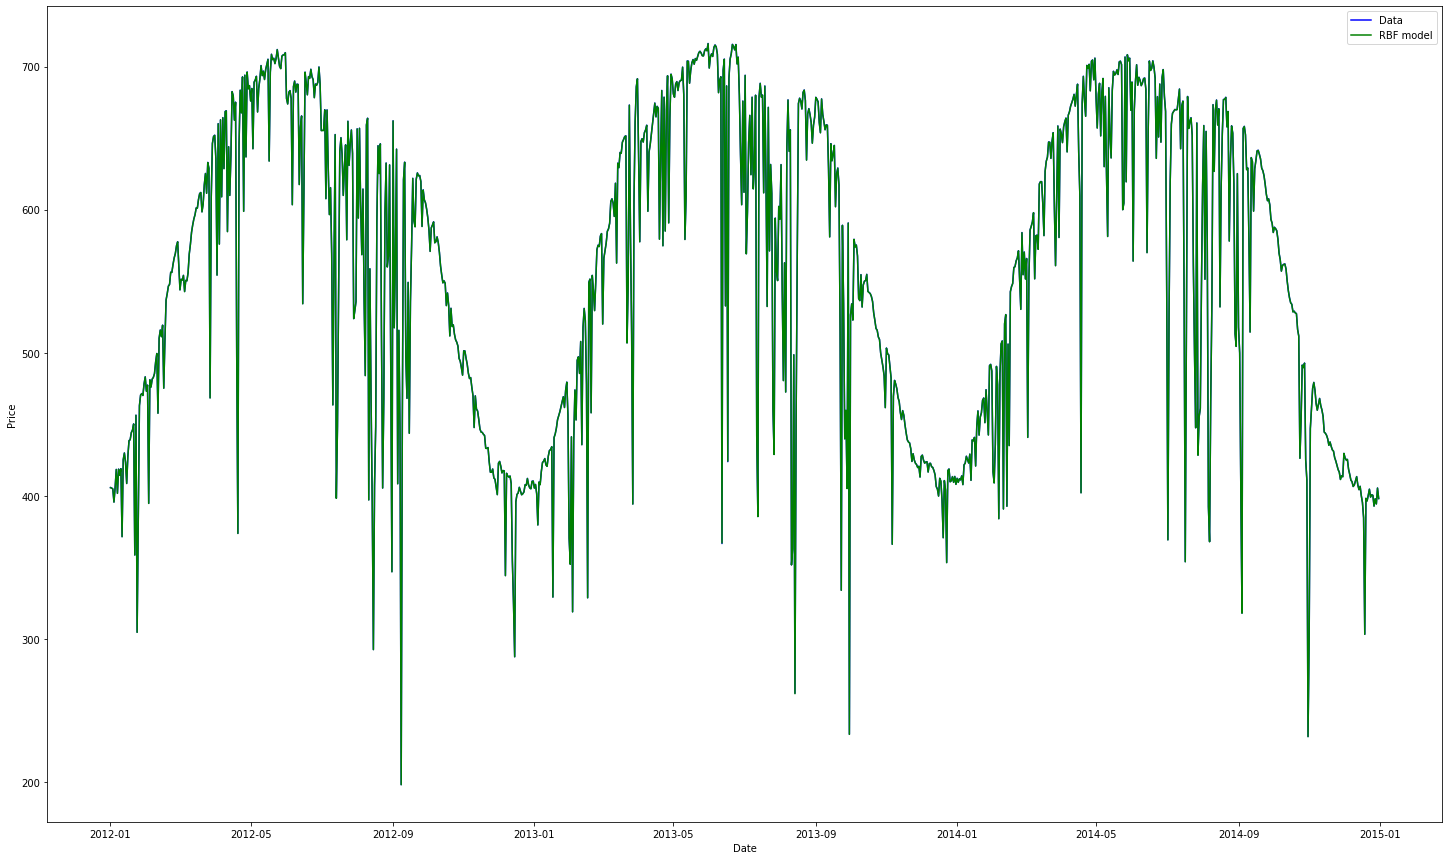

In [19]:
plt.figure(figsize = (25,15))
plt.plot(y[4380:].index, y[4380:], color= 'blue', label= 'Data')
plt.plot(y[4380:].index,np.asarray(yhat).reshape(1095,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
MLPdata = pd.DataFrame(columns=['Date','GHI'])
MLPdata['Date'] = y[4380:].index
MLPdata['GHI'] = np.asarray(yhat).reshape(1095,)
MLPdata.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/MLPdaily.csv')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[4380:],np.asarray(yhat).reshape(1095,) ,squared=False)

0.020786958941513264

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y[4380:],np.asarray(yhat).reshape(1095,))

2.075767271968319e-05